# 1. Importing packages

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

# 2. Creating the function to entangle, encode, and decode  our qubits

In super dense coding our aim is to send the information of 2 classical bits from Alice to Bob using the transfer of only one qubit. In this we begin with Charlie creating a pair of entangled qubits and sending one each to Alice and Bob.


Alice then applies an unitary operation based on which of the values( 00,01,10,11) she ants to send and then sends it to Bob.

Bob upon recieving the qubit applies a CNOT gate on recieved qubit(source) and the one he has(target) and gets the information in Z basis(in the source ) onto his target qubit and then proceeds to extract the X basis information by applying an Hadamard gate and measuring it (i.e. changing the X basis information to Z basis and then measuring both the qubits in Z basis).

In [2]:
def bell_state(qc,a,b):
    qc.h(a)
    qc.cx(a,b)
    return

def alice_encode(qc,a,msg):
    if msg=='00':
        pass
    elif msg=='01':
        qc.x(a)
    elif msg=='10':
        qc.z(a)
    elif msg=='11':
        qc.x(a)
        qc.z(a)
    return

def bob_decode(qc,a,b):
    qc.cx(a,b)
    qc.h(a)
    return

# 3. Testing our super dense coding circuit

## 3.1 Making our circuit

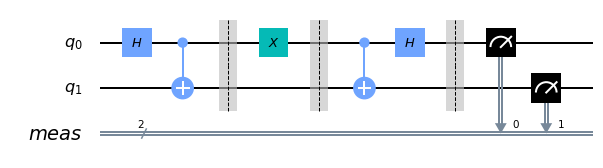

In [3]:
qc=QuantumCircuit(2)

msg='01'

bell_state(qc,0,1)
qc.barrier()
alice_encode(qc,0,msg)
qc.barrier()
bob_decode(qc,0,1)
qc.measure_all()

qc.draw('mpl')

## 3.2 Running on Backend

In [4]:
backend=Aer.get_backend('qasm_simulator')
results= execute(qc,backend=backend,shots=1024).result()
print(results.get_counts(qc))

{'10': 1024}


We get the same result as we encoded previously in our circuit. But due to Qiskit's representation we get the reversed representation of the qubits states.

## 3.3 Visualizaing the output

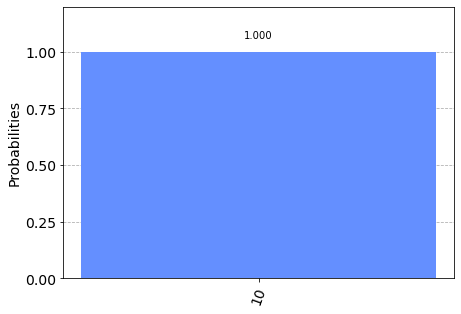

In [5]:
plot_histogram(results.get_counts(qc))